In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.style.use('seaborn-v0_8-whitegrid')

## Разложение ряда на тренд, гармоники и шум

В методе SSA мы стремимся получить исходный ряд как сумму $f(x) = g(x) + \pi(x) + \epsilon$, где $g(x)$ - трендовая компонента, $\pi(x)$ - сезонная и $\epsilon$ - шум. Однозначного определения тренда не существует, обычно он интуитивно полагается как малоизменчивая компонента ряда. 

**NB!** Шум ($\epsilon$) не обязательно обозначает случайную величину. Во многих случаях к ней удобнее относится как к необъяснённой двумя другими компонентами ошибке аппроксимации.

Представим три компоненты на графике


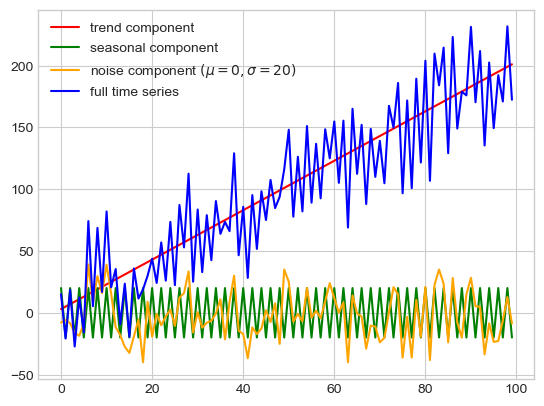

In [6]:
x = np.arange(100)
trend = 2*x + 3 # линейный тренд
harmonic = 20*np.cos(x*np.pi) # гармоника с периодом 2pi**2 
noise = np.random.normal(0,20, size = 100) # белый шум с std = 20

plt.plot(x, trend, color = 'red', label = 'trend component')
plt.plot(x, harmonic, color = 'green', label = 'seasonal component')
plt.plot(x, noise, color = 'orange', label = 'noise component $(\mu = 0, \sigma = 20)$')
plt.plot(x, trend + harmonic + noise, c = 'b', label = 'full time series')

plt.legend()
plt.savefig('Series decomposition example.png', dpi = 300)
plt.show()

## Иллюстративный пример

Рассмотрим простой пример работы алгоритма (без использования написанных функций). Путь наш временной ряд описывается простой зависимостью $y = 2x, x \in {0,1...4}$. Тогда $y = (0,2,4,6,8)$. 

Траекторная матрица для длинны окна $l=2$
$$
Y = \begin{pmatrix}
0 & 2 & 4 & 6 \\
2 & 4 & 6 & 8
\end{pmatrix}
$$

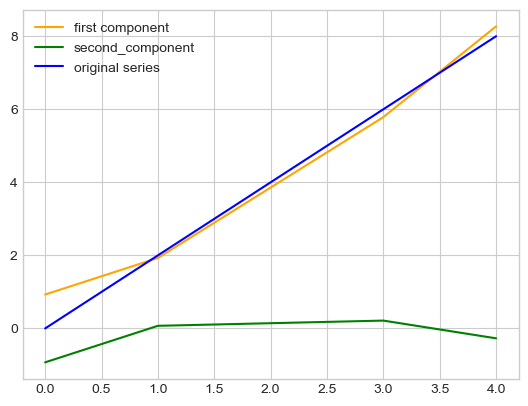

In [3]:
Y = np.array([[0,2,4,6], [2,4,6,8]])
x = np.arange(5)

U, sigma, V = np.linalg.svd(Y, full_matrices = False)

first_component = (U[:, 0][:, np.newaxis] * sigma[0] * V[0, :])[::-1]
first_component = np.array([first_component.diagonal(i).mean() for i in range(-first_component.shape[0]+1, first_component.shape[1])])

second_component = (U[:, 1][:, np.newaxis] * sigma[1] * V[1, :])[::-1]
second_component = np.array([second_component.diagonal(i).mean() for i in range(-second_component.shape[0]+1, second_component.shape[1])])

plt.plot(x, first_component, c = 'orange', label = 'first component')
plt.plot(x, second_component, c = 'green', label = 'second_component')
plt.plot(x, 2*x, c = 'b', label = 'original series')
plt.legend()
plt.savefig('Illustrative example of SSA for linear series.png', dpi = 300)
plt.show()